# Logistic Regression algortihm.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as s
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("tumor_data.csv")

In [3]:
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [61]:
#Data preprocessing.

In [4]:
col = raw_data.columns

In [5]:
raw_data.drop([col[0], col[32]], axis=1, inplace=True)

In [6]:
labels = raw_data[col[1]]

In [62]:
#Splitting the data into training and  testing parts.

In [7]:
training_data = raw_data.iloc[:int(0.70*(len(raw_data)))]
training_data.shape

(398, 31)

In [8]:
testing_data = raw_data.iloc[int(0.70*(len(raw_data))):]
testing_data.shape

(171, 31)

In [9]:
training_data = pd.DataFrame(training_data)
testing_data = pd.DataFrame(testing_data)

In [10]:
training_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
training_data[col[1]].replace('M',1, inplace=True)
training_data[col[1]].replace('B', 0, inplace=True)

In [12]:
training_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
labels = training_data[col[1]]

In [14]:
labels.shape

(398,)

In [15]:
c = np.array(labels)

In [16]:
c = c.reshape(398,1)

In [17]:
dropped_train_data = training_data.drop([col[1]], axis=1)

In [18]:
dropped_train_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
#Normalising the data set.
X = np.array(dropped_train_data)
X = X/np.max(X, axis=0)

In [20]:
X.shape

(398, 30)

In [21]:
# Initialising thetas from normal distribution
theta0_initial = np.random.randn(1,1)
theta0_initial

array([[0.28636778]])

In [22]:
theta_initial = np.random.randn(X.shape[1],1)
theta_initial.shape

(30, 1)

In [23]:
power = (theta0_initial + (np.matmul(X,theta_initial)))

In [24]:
power.shape

(398, 1)

In [25]:
H = 1/(1+np.exp(-power))

In [26]:
H.shape

(398, 1)

In [27]:
temp = H - c
temp.shape

(398, 1)

In [28]:
dels = np.matmul(X.T,temp)

In [29]:
dels.shape

(30, 1)

In [30]:
N = dropped_train_data.shape[0]
n = dropped_train_data.shape[1]
print(N)
print(n)

398
30


In [32]:
i = 0
alpha = 0.01
epsilon = 0.0001
anl_history = []
iterations = []

while(True):
    
    #Calculating derivative matrix wrt to all thetas.
    power_initial = theta0_initial + np.matmul(X, theta_initial)
    H_initial = 1/(1+np.exp(-power_initial))
    temp0 = (H_initial - c)
    dels = np.matmul(X.T,temp0)/N
    
    #Computing the value of negative log likelihood function at initial values of thetas.
    neg_log_like_initial = - (np.matmul(c.T, np.log(H_initial)) + np.matmul((1-c).T, np.log(1-H_initial)))/N
                   
    #updating the values of thetas using gradient decent.
    theta0_final = theta0_initial - alpha*(np.sum(temp0)/N)
    theta_final = theta_initial - alpha*dels
    
    #Computing loss function on updated values of thetas.
    power_final = theta0_final + np.matmul(X, theta_final)
    H_final = 1/(1+np.exp(-power_final))
    neg_log_like_final = -(np.matmul(c.T,np.log(H_final)) + np.matmul((1-c).T, np.log(1-H_final)))/N
    
    if abs(neg_log_like_initial - neg_log_like_final) < epsilon:
                   break
    theta0_initial = theta0_final
    theta_initial = theta_final
    i +=1
    
    iterations.append(i)
    anl_history.append(neg_log_like_initial)
                   
    print("The value of Negative Log Likelihood Function in iteration # {} is {}".format(i, neg_log_like_initial))

The value of Negative Log Likelihood Function in iteration # 1 is [[2.70645078]]
The value of Negative Log Likelihood Function in iteration # 2 is [[2.69346121]]
The value of Negative Log Likelihood Function in iteration # 3 is [[2.68048725]]
The value of Negative Log Likelihood Function in iteration # 4 is [[2.66752923]]
The value of Negative Log Likelihood Function in iteration # 5 is [[2.65458748]]
The value of Negative Log Likelihood Function in iteration # 6 is [[2.64166233]]
The value of Negative Log Likelihood Function in iteration # 7 is [[2.62875413]]
The value of Negative Log Likelihood Function in iteration # 8 is [[2.61586321]]
The value of Negative Log Likelihood Function in iteration # 9 is [[2.60298994]]
The value of Negative Log Likelihood Function in iteration # 10 is [[2.59013468]]
The value of Negative Log Likelihood Function in iteration # 11 is [[2.57729778]]
The value of Negative Log Likelihood Function in iteration # 12 is [[2.56447962]]
The value of Negative Log

The value of Negative Log Likelihood Function in iteration # 161 is [[1.15805817]]
The value of Negative Log Likelihood Function in iteration # 162 is [[1.15357503]]
The value of Negative Log Likelihood Function in iteration # 163 is [[1.14915775]]
The value of Negative Log Likelihood Function in iteration # 164 is [[1.14480577]]
The value of Negative Log Likelihood Function in iteration # 165 is [[1.1405185]]
The value of Negative Log Likelihood Function in iteration # 166 is [[1.13629534]]
The value of Negative Log Likelihood Function in iteration # 167 is [[1.13213567]]
The value of Negative Log Likelihood Function in iteration # 168 is [[1.1280389]]
The value of Negative Log Likelihood Function in iteration # 169 is [[1.12400439]]
The value of Negative Log Likelihood Function in iteration # 170 is [[1.12003151]]
The value of Negative Log Likelihood Function in iteration # 171 is [[1.11611964]]
The value of Negative Log Likelihood Function in iteration # 172 is [[1.11226812]]
The va

The value of Negative Log Likelihood Function in iteration # 329 is [[0.8907112]]
The value of Negative Log Likelihood Function in iteration # 330 is [[0.89024991]]
The value of Negative Log Likelihood Function in iteration # 331 is [[0.88979137]]
The value of Negative Log Likelihood Function in iteration # 332 is [[0.88933552]]
The value of Negative Log Likelihood Function in iteration # 333 is [[0.8888823]]
The value of Negative Log Likelihood Function in iteration # 334 is [[0.88843165]]
The value of Negative Log Likelihood Function in iteration # 335 is [[0.88798353]]
The value of Negative Log Likelihood Function in iteration # 336 is [[0.88753787]]
The value of Negative Log Likelihood Function in iteration # 337 is [[0.88709462]]
The value of Negative Log Likelihood Function in iteration # 338 is [[0.88665374]]
The value of Negative Log Likelihood Function in iteration # 339 is [[0.88621517]]
The value of Negative Log Likelihood Function in iteration # 340 is [[0.88577885]]
The va

The value of Negative Log Likelihood Function in iteration # 510 is [[0.8258493]]
The value of Negative Log Likelihood Function in iteration # 511 is [[0.82553546]]
The value of Negative Log Likelihood Function in iteration # 512 is [[0.82522188]]
The value of Negative Log Likelihood Function in iteration # 513 is [[0.82490856]]
The value of Negative Log Likelihood Function in iteration # 514 is [[0.82459552]]
The value of Negative Log Likelihood Function in iteration # 515 is [[0.82428273]]
The value of Negative Log Likelihood Function in iteration # 516 is [[0.82397021]]
The value of Negative Log Likelihood Function in iteration # 517 is [[0.82365795]]
The value of Negative Log Likelihood Function in iteration # 518 is [[0.82334595]]
The value of Negative Log Likelihood Function in iteration # 519 is [[0.82303421]]
The value of Negative Log Likelihood Function in iteration # 520 is [[0.82272274]]
The value of Negative Log Likelihood Function in iteration # 521 is [[0.82241152]]
The v

The value of Negative Log Likelihood Function in iteration # 680 is [[0.77592241]]
The value of Negative Log Likelihood Function in iteration # 681 is [[0.77564762]]
The value of Negative Log Likelihood Function in iteration # 682 is [[0.77537304]]
The value of Negative Log Likelihood Function in iteration # 683 is [[0.77509867]]
The value of Negative Log Likelihood Function in iteration # 684 is [[0.7748245]]
The value of Negative Log Likelihood Function in iteration # 685 is [[0.77455054]]
The value of Negative Log Likelihood Function in iteration # 686 is [[0.77427679]]
The value of Negative Log Likelihood Function in iteration # 687 is [[0.77400324]]
The value of Negative Log Likelihood Function in iteration # 688 is [[0.7737299]]
The value of Negative Log Likelihood Function in iteration # 689 is [[0.77345677]]
The value of Negative Log Likelihood Function in iteration # 690 is [[0.77318385]]
The value of Negative Log Likelihood Function in iteration # 691 is [[0.77291113]]
The va

The value of Negative Log Likelihood Function in iteration # 841 is [[0.7342427]]
The value of Negative Log Likelihood Function in iteration # 842 is [[0.73399918]]
The value of Negative Log Likelihood Function in iteration # 843 is [[0.73375585]]
The value of Negative Log Likelihood Function in iteration # 844 is [[0.7335127]]
The value of Negative Log Likelihood Function in iteration # 845 is [[0.73326973]]
The value of Negative Log Likelihood Function in iteration # 846 is [[0.73302694]]
The value of Negative Log Likelihood Function in iteration # 847 is [[0.73278433]]
The value of Negative Log Likelihood Function in iteration # 848 is [[0.7325419]]
The value of Negative Log Likelihood Function in iteration # 849 is [[0.73229964]]
The value of Negative Log Likelihood Function in iteration # 850 is [[0.73205757]]
The value of Negative Log Likelihood Function in iteration # 851 is [[0.73181568]]
The value of Negative Log Likelihood Function in iteration # 852 is [[0.73157397]]
The val

The value of Negative Log Likelihood Function in iteration # 992 is [[0.69943049]]
The value of Negative Log Likelihood Function in iteration # 993 is [[0.69921251]]
The value of Negative Log Likelihood Function in iteration # 994 is [[0.69899468]]
The value of Negative Log Likelihood Function in iteration # 995 is [[0.69877701]]
The value of Negative Log Likelihood Function in iteration # 996 is [[0.69855949]]
The value of Negative Log Likelihood Function in iteration # 997 is [[0.69834214]]
The value of Negative Log Likelihood Function in iteration # 998 is [[0.69812494]]
The value of Negative Log Likelihood Function in iteration # 999 is [[0.69790789]]
The value of Negative Log Likelihood Function in iteration # 1000 is [[0.69769101]]
The value of Negative Log Likelihood Function in iteration # 1001 is [[0.69747428]]
The value of Negative Log Likelihood Function in iteration # 1002 is [[0.69725771]]
The value of Negative Log Likelihood Function in iteration # 1003 is [[0.69704129]]


The value of Negative Log Likelihood Function in iteration # 1129 is [[0.67097668]]
The value of Negative Log Likelihood Function in iteration # 1130 is [[0.67077901]]
The value of Negative Log Likelihood Function in iteration # 1131 is [[0.67058148]]
The value of Negative Log Likelihood Function in iteration # 1132 is [[0.67038408]]
The value of Negative Log Likelihood Function in iteration # 1133 is [[0.67018682]]
The value of Negative Log Likelihood Function in iteration # 1134 is [[0.66998971]]
The value of Negative Log Likelihood Function in iteration # 1135 is [[0.66979273]]
The value of Negative Log Likelihood Function in iteration # 1136 is [[0.66959589]]
The value of Negative Log Likelihood Function in iteration # 1137 is [[0.66939918]]
The value of Negative Log Likelihood Function in iteration # 1138 is [[0.66920262]]
The value of Negative Log Likelihood Function in iteration # 1139 is [[0.66900619]]
The value of Negative Log Likelihood Function in iteration # 1140 is [[0.668

The value of Negative Log Likelihood Function in iteration # 1270 is [[0.64442115]]
The value of Negative Log Likelihood Function in iteration # 1271 is [[0.64424188]]
The value of Negative Log Likelihood Function in iteration # 1272 is [[0.64406274]]
The value of Negative Log Likelihood Function in iteration # 1273 is [[0.64388372]]
The value of Negative Log Likelihood Function in iteration # 1274 is [[0.64370482]]
The value of Negative Log Likelihood Function in iteration # 1275 is [[0.64352604]]
The value of Negative Log Likelihood Function in iteration # 1276 is [[0.64334739]]
The value of Negative Log Likelihood Function in iteration # 1277 is [[0.64316885]]
The value of Negative Log Likelihood Function in iteration # 1278 is [[0.64299044]]
The value of Negative Log Likelihood Function in iteration # 1279 is [[0.64281215]]
The value of Negative Log Likelihood Function in iteration # 1280 is [[0.64263398]]
The value of Negative Log Likelihood Function in iteration # 1281 is [[0.642

The value of Negative Log Likelihood Function in iteration # 1429 is [[0.61738303]]
The value of Negative Log Likelihood Function in iteration # 1430 is [[0.61722188]]
The value of Negative Log Likelihood Function in iteration # 1431 is [[0.61706083]]
The value of Negative Log Likelihood Function in iteration # 1432 is [[0.61689988]]
The value of Negative Log Likelihood Function in iteration # 1433 is [[0.61673904]]
The value of Negative Log Likelihood Function in iteration # 1434 is [[0.61657831]]
The value of Negative Log Likelihood Function in iteration # 1435 is [[0.61641768]]
The value of Negative Log Likelihood Function in iteration # 1436 is [[0.61625716]]
The value of Negative Log Likelihood Function in iteration # 1437 is [[0.61609674]]
The value of Negative Log Likelihood Function in iteration # 1438 is [[0.61593642]]
The value of Negative Log Likelihood Function in iteration # 1439 is [[0.61577622]]
The value of Negative Log Likelihood Function in iteration # 1440 is [[0.615

The value of Negative Log Likelihood Function in iteration # 1592 is [[0.59244735]]
The value of Negative Log Likelihood Function in iteration # 1593 is [[0.59230225]]
The value of Negative Log Likelihood Function in iteration # 1594 is [[0.59215725]]
The value of Negative Log Likelihood Function in iteration # 1595 is [[0.59201235]]
The value of Negative Log Likelihood Function in iteration # 1596 is [[0.59186753]]
The value of Negative Log Likelihood Function in iteration # 1597 is [[0.5917228]]
The value of Negative Log Likelihood Function in iteration # 1598 is [[0.59157817]]
The value of Negative Log Likelihood Function in iteration # 1599 is [[0.59143362]]
The value of Negative Log Likelihood Function in iteration # 1600 is [[0.59128917]]
The value of Negative Log Likelihood Function in iteration # 1601 is [[0.59114481]]
The value of Negative Log Likelihood Function in iteration # 1602 is [[0.59100054]]
The value of Negative Log Likelihood Function in iteration # 1603 is [[0.5908

The value of Negative Log Likelihood Function in iteration # 1751 is [[0.57047711]]
The value of Negative Log Likelihood Function in iteration # 1752 is [[0.57034562]]
The value of Negative Log Likelihood Function in iteration # 1753 is [[0.57021421]]
The value of Negative Log Likelihood Function in iteration # 1754 is [[0.57008288]]
The value of Negative Log Likelihood Function in iteration # 1755 is [[0.56995163]]
The value of Negative Log Likelihood Function in iteration # 1756 is [[0.56982046]]
The value of Negative Log Likelihood Function in iteration # 1757 is [[0.56968936]]
The value of Negative Log Likelihood Function in iteration # 1758 is [[0.56955835]]
The value of Negative Log Likelihood Function in iteration # 1759 is [[0.56942742]]
The value of Negative Log Likelihood Function in iteration # 1760 is [[0.56929656]]
The value of Negative Log Likelihood Function in iteration # 1761 is [[0.56916579]]
The value of Negative Log Likelihood Function in iteration # 1762 is [[0.569

The value of Negative Log Likelihood Function in iteration # 1912 is [[0.55028968]]
The value of Negative Log Likelihood Function in iteration # 1913 is [[0.55017019]]
The value of Negative Log Likelihood Function in iteration # 1914 is [[0.55005078]]
The value of Negative Log Likelihood Function in iteration # 1915 is [[0.54993144]]
The value of Negative Log Likelihood Function in iteration # 1916 is [[0.54981216]]
The value of Negative Log Likelihood Function in iteration # 1917 is [[0.54969296]]
The value of Negative Log Likelihood Function in iteration # 1918 is [[0.54957382]]
The value of Negative Log Likelihood Function in iteration # 1919 is [[0.54945476]]
The value of Negative Log Likelihood Function in iteration # 1920 is [[0.54933576]]
The value of Negative Log Likelihood Function in iteration # 1921 is [[0.54921683]]
The value of Negative Log Likelihood Function in iteration # 1922 is [[0.54909798]]
The value of Negative Log Likelihood Function in iteration # 1923 is [[0.548

The value of Negative Log Likelihood Function in iteration # 2072 is [[0.53202074]]
The value of Negative Log Likelihood Function in iteration # 2073 is [[0.5319117]]
The value of Negative Log Likelihood Function in iteration # 2074 is [[0.53180272]]
The value of Negative Log Likelihood Function in iteration # 2075 is [[0.5316938]]
The value of Negative Log Likelihood Function in iteration # 2076 is [[0.53158494]]
The value of Negative Log Likelihood Function in iteration # 2077 is [[0.53147614]]
The value of Negative Log Likelihood Function in iteration # 2078 is [[0.53136741]]
The value of Negative Log Likelihood Function in iteration # 2079 is [[0.53125873]]
The value of Negative Log Likelihood Function in iteration # 2080 is [[0.53115011]]
The value of Negative Log Likelihood Function in iteration # 2081 is [[0.53104156]]
The value of Negative Log Likelihood Function in iteration # 2082 is [[0.53093306]]
The value of Negative Log Likelihood Function in iteration # 2083 is [[0.53082

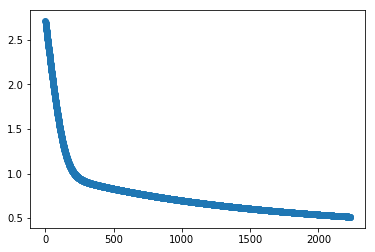

In [34]:
plt.scatter(iterations, anl_history)

In [35]:
theta0_final

array([[-0.14474859]])

In [36]:
theta_final.shape

(30, 1)

In [56]:
#Performing testing.
class_labels = testing_data['diagnosis']
class_labels.replace('B',0, inplace=True)
class_labels.replace('M',1)

398    0
399    0
400    1
401    0
402    0
403    0
404    0
405    0
406    0
407    0
408    1
409    0
410    0
411    0
412    0
413    0
414    1
415    0
416    0
417    1
418    0
419    0
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
      ..
539    0
540    0
541    0
542    0
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    0
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    1
563    1
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 171, dtype: int64

In [40]:
class_labels_re = class_labels.reshape(class_labels.shape[0],1)
class_labels_re.shape

(171, 1)

In [41]:
actual_testing_data = testing_data.drop(['diagnosis'], axis=1)

In [43]:
actual_testing_data.shape

(171, 30)

In [44]:
actual_testing_data = actual_testing_data/np.max(actual_testing_data, axis=0)
actual_testing_data.shape

(171, 30)

In [45]:
final_power = theta0_final + np.matmul(actual_testing_data, theta_final)

In [48]:
final_h = 1/(1+np.exp(-final_power))

In [49]:
final_h.shape

(171, 1)

In [57]:
#Calculating accuracy.
greater = []

for i in range(final_h.shape[0]):
    if final_h[i]>=0.5:
        greater.append(int(1))
    else:
        greater.append(int(0))
greater = np.array(greater)
np.count_nonzero(greater)

28

In [58]:
np.count_nonzero(class_labels)

39

In [59]:
print("Accuracy : ", round(np.count_nonzero(greater == class_labels) / class_labels.shape[0] * 100 , 2) , " %")

Accuracy :  74.85  %


In [63]:
# We are getting accuracy of 74.58%.